---
# Linear regression exercises

---
These are introductory exercises in Machine learning with focus in **linear regression** .

<p class = "alert alert-info" role="alert"><b>Note</b> all datasets used in this exercise can be found under Data folder of the course Github repo</p>

<p class = "alert alert-info" role="alert"><b>Note</b> that in cases when you start to repeat code, try not to. Create functions to reuse code instead. </p>

<p class = "alert alert-info" role="alert"><b>Remember</b> to use <b>descriptive variable, function, index </b> and <b> column names</b> in order to get readable code </p>

The number of stars (\*), (\*\*), (\*\*\*) denotes the difficulty level of the task

---

## 0. Simulate phone dataset (*)

We want to simulate data $(x,y)$ to represent cost for phone subscriptions, with: 

- $x$ - called minutes per month
- $y$ - SEK per month 

&nbsp; a) Use ```numpy.random.normal()``` to simulate a dataset with the following requirements:(*)
- set a seed to 42 (for reproducibility and reference)
- simulate 400 x-values from the r.v. $X \sim \mathcal{N}(100, 100)$ 
- take absolute value of these x-values
- simulate noise 400 noise values from r.v. $\epsilon \sim \mathcal{N(0, 50)}$ 
- Let $y = 2x+25+\epsilon$
- plot the data set 

&nbsp; b) Now we want to remove some outliers according to this assumption: (*)
- no one talks more than 300 min using this type of subscription
- no ones costs can be negative
- plot the new dataset
- also plot ground truth using the true parameters $\beta_0 = 25, \beta_1 = 2$

&nbsp; c) Insert the values into a DataFrame (*)

<details>

<summary>Answer</summary>

<img src="../assets/simulated_phone_dataset_0.png" height="200"/>

a) 

Number of points x ≥ 300 min: 8

Number of points y < 0 kr: 6


b)

Length of x, outliers removed 386

Length of y, outliers removed 386

c)

df.head()

|    |   Minutes |     Cost |
|---:|----------:|---------:|
|  0 |   59.4428 | 168.721  |
|  1 |   40.0625 |  98.2118 |
|  2 |  100.524  | 258.433  |
|  3 |  104.698  | 310.548  |
|  4 |   54.9935 | 123.279  |


</details>

---

In [1]:
import numpy as np
import seaborn as sns

Text(0, 0.5, 'SEK/Month')

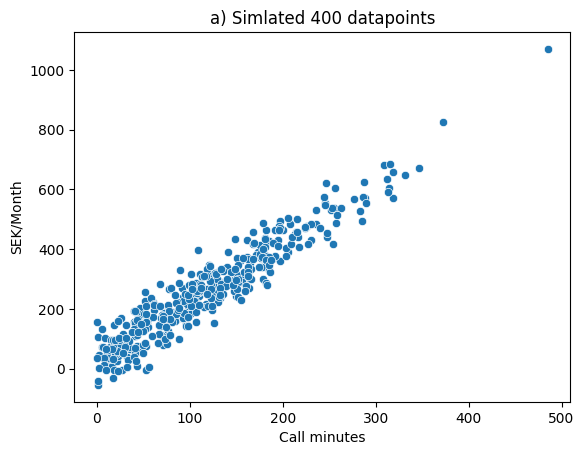

In [2]:
# a)
sample = 400
np.random.seed(42)
X =np.abs(np.random.normal(loc=100, scale=100,size=sample)) # Using abs to prevent negative values
e = np.random.normal(loc=0, scale=50, size=sample)
y = 2*X + 25 + e

ax = sns.scatterplot(x=X, y=y)
ax.set_title('a) Simlated 400 datapoints')
ax.set_xlabel('Call minutes')
ax.set_ylabel('SEK/Month')

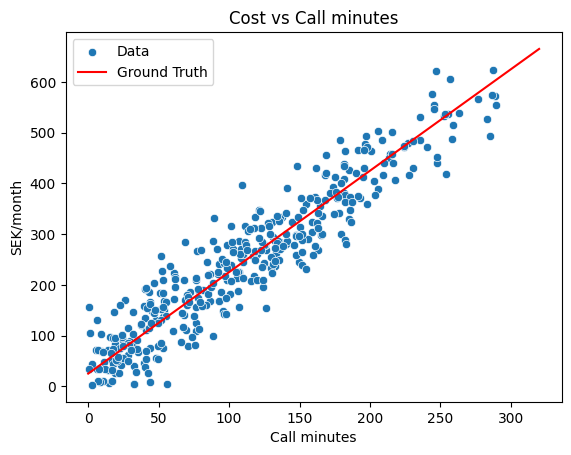

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame()
df['Call minutes'] = X
df['SEK/month'] = y
cleaned_df = df.query("`Call minutes` <= 300 and `SEK/month` > 0")

beta_0 = 25 
beta_1 = 2
y_hat = lambda x: beta_0 + beta_1*x #ground truth
cost = np.linspace(0, 320)
ax = sns.scatterplot(data=cleaned_df, x='Call minutes',y='SEK/month', label='Data')
sns.lineplot(x=cost, y=y_hat(cost), color='r', label='Ground Truth')
ax.set_title('Cost vs Call minutes')
ax.legend()


## 1. Train|test split (*)

Before moving on with linear regression we shall first perform a train-test-split. 

&nbsp; a) Create a train-test-split function with the following call signature: (*)

```py
def train_test_split(X: pd.DataFrame, y: pd.DataFrame, train_fraction=.7: float, random_state=42: int, replace=False: bool) -> tuple
```

that returns the tuple:
```
(X_train, X_test, y_train, y_test)
```

&nbsp; b) Now use this to split up your data into a training set and test set. Check manually that the split is performed correctly. (*)


<details>

<summary>Hint</summary>

b) Check the length of each set, and check the indices of the sorted sets that they don't overlap and are not missing. Also check that they sum up to what you expect.

</details>

<br/>

<details>

<summary>Answer</summary>

Using default 0.7: 
- length of X_train: 270
- length of X_test: 116
- length of y_train: 270
- length of X_test: 116

</details>

---

In [4]:
train_fraction = int(len(cleaned_df)*0.7)

train = cleaned_df.sample(n=train_fraction, random_state=42, replace=False)
train.insert(0, 'intercept', 1)

train.head()

,intercept,Call minutes,SEK/month
277,1,39.978312,192.570147
196,1,11.614256,34.734766
46,1,53.936123,151.202158
55,1,193.128012,371.612382
57,1,69.078762,111.395409


In [5]:
test = cleaned_df.drop(train.index)
test.insert(0, 'intercept', 1)

train.shape, test.shape

((266, 3), (115, 3))

In [6]:
X_train, y_train = train.drop('SEK/month', axis='columns'), train['SEK/month']
X_test, y_test = test.drop('SEK/month', axis='columns'), test['SEK/month']

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((266, 2), (266,), (115, 2), (115,))

## 2. Simple linear regression with normal equation (*)

Use the normal equation for simple linear regression to solve for the coefficients $\hat{\beta} = (\beta_0, \beta_1)$. Note that you should only use the training data to fit the regression line, and not data from the test set. Plot the the regression line, together with ground truth and training data. 

<details>

<summary>Hint</summary>

It is important to keep track of the shapes of the vectors, matrices in order for matrix multiplication matmul "@" to work correctly. Also, if you have series object, you need to convert it to numpy. 

</details>

<br/>

<details>

<summary>Answer</summary>


<img src="../assets/Reg_line_normal_eq.png" height="200"/>

</details>

---

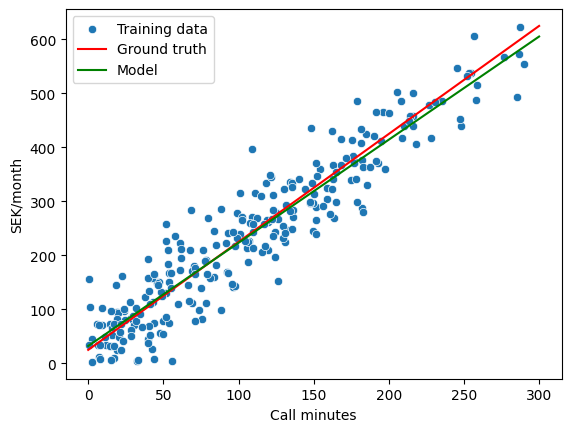

In [7]:
regression_fit = lambda X, y: np.linalg.inv(X.T @ X) @ X.T @ y 
beta_hat = regression_fit(X_train, y_train)

# Scatter plot
ax = sns.scatterplot(x=X_train['Call minutes'], y=y_train, label='Training data')

# Plot the ground truth
x = np.linspace(0, 300)
sns.lineplot(x=x, y=y_hat(x), color='red', label='Ground truth')

# Calculate the model prediction
y_model = beta_hat[0] + beta_hat[1] * x

# Plot the model
sns.lineplot(x=x, y=y_model, label='Model', color='green')

# Set legend
ax.legend()



## 3. Prediction and evaluation (*)

&nbsp; a) Use your model to make prediction on testing data. Plot the prediction cost against X_test, and y_test against X_test. (*)

&nbsp; b) Calculate MAE, MSE, RMSE (*)

<details>

<summary>Hint</summary>

Calculate y_pred from X_test and use y_test and y_pred to compute different evaluation metrics.

Careful with dimensions when computing the evaluation metrics, else it can be catastrophical logical errors due to numpy broadcasting feature.

Note that after you have calculate the error metrics on test data you are not allowed to change any parameters to make the line fit better to the testing data.

</details>

<br/>

<details>

<summary>Answer</summary>

a) 

<img src="../assets/eval_simple_lin_reg.png" height="200"/>

b)

Mean absolute error on testing data: 36.97 kr

Mean squared error on testing data: 2374 kr^2

Root mean squared error on testing data: 48.72 kr

</details>

---

In [8]:
beta_hat = regression_fit(X_train, y_train)
print(f"Beta parameters:\n{beta_hat}")

predict = lambda X, weights: X @ weights

beta_hat = np.reshape(beta_hat.to_numpy(), (2,1))

y_hat = predict(X_test, beta_hat).to_numpy()

y_hat[:5] # Är prediktionen för första fem värdena

Beta parameters:
0    32.221477
1     1.910506
dtype: float64


array([[196.85659218],
       [178.53692796],
       [133.57870958],
       [206.70420815],
       [170.71745789]])

In [9]:
X_test.iloc[0] # If one make phone calls for 86 minutes the cost will probably be 196 SEK/month.

intercept        1.00000
Call minutes    86.17357
Name: 1, dtype: float64

Text(0.5, 1.0, 'Test data vs Predictions')

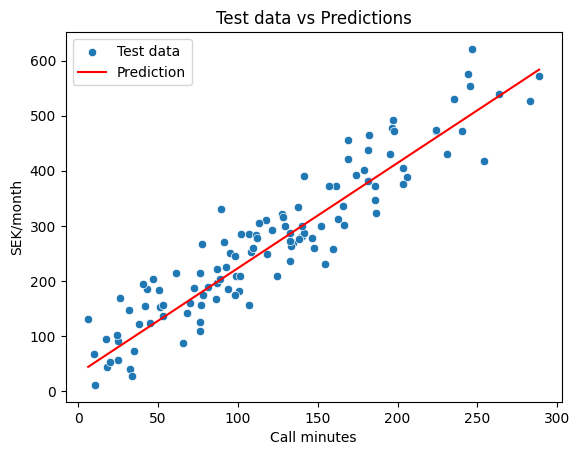

In [10]:
ax = sns.scatterplot(x=X_test['Call minutes'], y=y_test, label='Test data')
sns.lineplot(x=X_test['Call minutes'], y=y_hat.flatten(), label='Prediction', color='red') # Using flatten to flatten the array and plot it.
ax.legend()
ax.set_title('Test data vs Predictions')


In [11]:
m = len(y_test)
y_hat = np.reshape(y_hat, (m))

mean_absolute_error = 1/m*np.sum(np.abs(y_test-y_hat))
mean_squared_error = 1/m*np.sum((y_test-y_hat)**2)
root_mean_squared_error = np.sqrt(mean_squared_error)

print(f'Mean absolute error on testing data: {mean_absolute_error} kr')
print(f'Mean squared error on testing data: {mean_squared_error} kr')
print(f'Root mean squared error on testing data: {root_mean_squared_error} kr')

Mean absolute error on testing data: 40.12002651149212 kr
Mean squared error on testing data: 2401.577128867729 kr
Root mean squared error on testing data: 49.00588871623214 kr


## 4. Simulate more explanatory variables (\*)

Now we will simulate the explanatory variables for minutes, text messages and amount of surf. For reference and reproducibility use numpy random seed 42. Assume there is:

- mean start cost: 25kr
- mean cost per minute: 2kr
- mean cost per sms: 50 öre
- mean cost per GB: 50kr

Then the model for the cost will be:
$y = 25 + 2x_1 + 0.5x_2 + 50x_3 + \epsilon$, where

- $x_i$ sampled from r.v. $X_i$ for $i = \{1,2,3\}$
- $X_1 \sim |\mathcal{N}(100,100)|$, (absolute value)
- $X_2 \sim \mathcal{U}(0,50)$, (discrete uniform distribution)
- $X_3 \sim |\mathcal{N}(0,2)|$,
- $\epsilon \sim \mathcal{N}(0,50)$

&nbsp; a) Simulate 10000 samples of each of $x_1, x_2, x_3$ and $y$ and save them in a DataFrame. Also add an intercept column containing ones. (\*)

&nbsp; b) Make histograms for each of the explanatory variables $x_1, x_2, x_3$ and the response variable $y$ (\*)

&nbsp; c) Clean the data using the following constraints (\*)

- surf should be less than 4
- minutes should be less than 300
- cost should be larger than 0

&nbsp; d) Make new histograms for the variables. (\*)

<details>

<summary>Hint</summary>
Your data analysis skill toolbox together with statistics and linear algebra skills are getting quite handy here.

</details>

<br/>

<details>

<summary>Answer</summary>

a)

|      | Intercept | Minutes | SMS | Surf (GB) |    Cost |
| ---: | --------: | ------: | --: | --------: | ------: |
|    0 |         1 | 149.671 |  41 |   2.26301 | 502.396 |
|    1 |         1 | 86.1736 |  16 | 0.0315695 | 179.072 |
|  ... |       ... |     ... | ... |       ... |     ... |
| 9318 |         1 | 149.577 |  31 |   3.43929 | 536.176 |
| 9319 |         1 | 164.439 |  43 |   1.40641 | 406.674 |

b)

<img src="../assets/hist_variables.png" height="200"/>

d)

<img src="../assets/hist_var_cleaned.png" height="200"/>

</details>

---


In [12]:
np.random.seed(42)
sample = 10000
minutes = np.abs(np.random.normal(loc=100, scale=100, size=sample))
sms = np.random.uniform(low=0, high=50, size=sample)
surf = np.abs(np.random.normal(loc=0, scale=2, size=sample))
e = np.abs(np.random.normal(loc=0, scale=50, size=sample))
y = 25 + (2*minutes) + (0.5*sms) + (50*surf) + e
df = pd.DataFrame()
df['minutes'] = minutes
df['sms'] = sms
df['surf'] = surf
df['cost'] = y
df.insert(0,'intercept',1)
df.head()


,intercept,minutes,sms,surf,cost
0,1,149.671415,16.062759,0.958919,397.262506
1,1,86.173570,5.150960,2.056136,322.573408
2,1,164.768854,3.590377,1.004004,458.575762
3,1,252.302986,4.713799,3.413725,739.527176
4,1,76.584663,29.143468,0.535679,284.434603


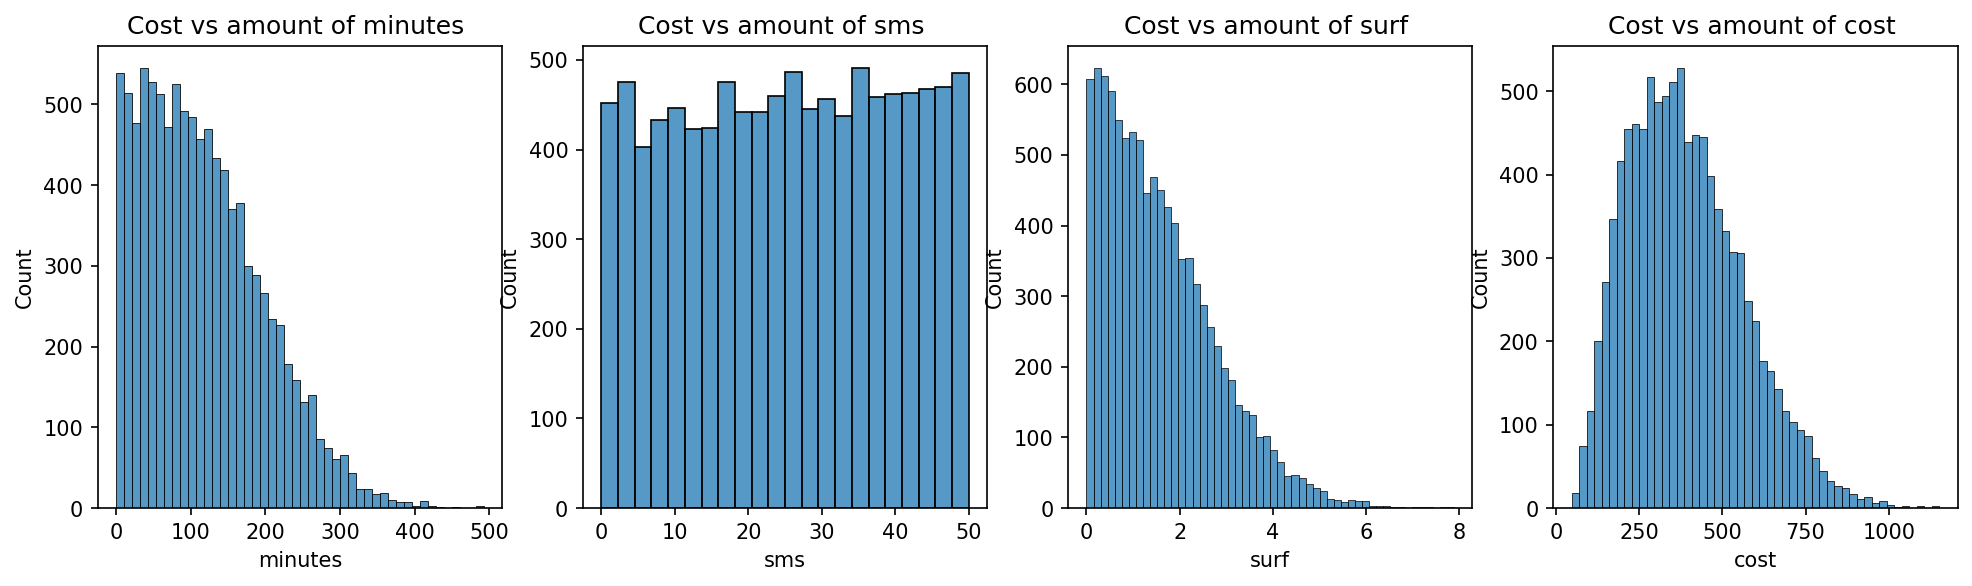

In [13]:
number_features = 4
fig, ax = plt.subplots(1, number_features, figsize=(16, 4), dpi=150)

for i, feature in enumerate(df.columns[1:]):
    sns.histplot(data=df, 
                    x=feature,
                    ax=ax[i])
    ax[i].set_title(f"Cost vs amount of {feature} ")

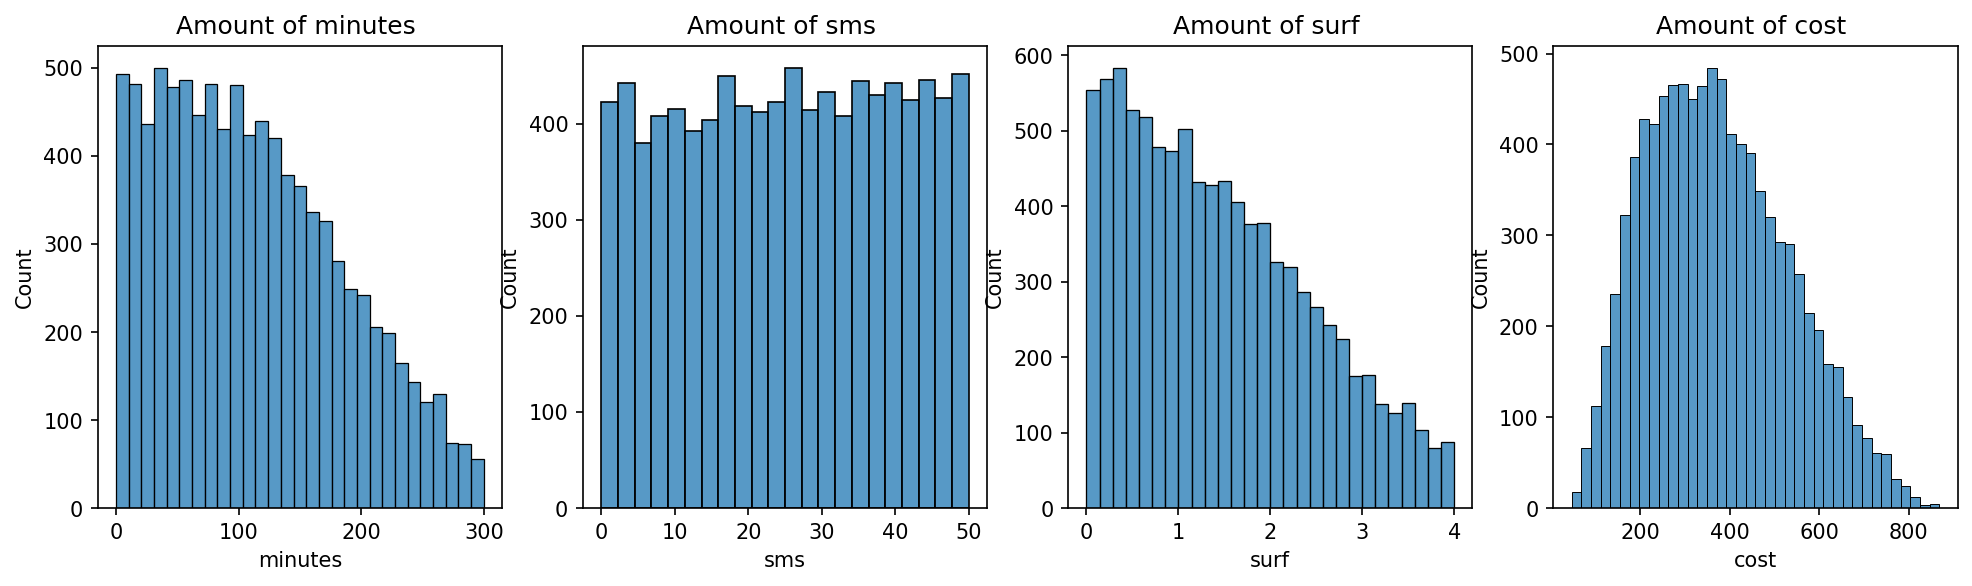

In [14]:
filtered_df = df.query("minutes < 300 and surf < 4 and cost > 0")
number_features = 4
fig, ax = plt.subplots(1, number_features, figsize=(16, 4), dpi=150)

for i, feature in enumerate(filtered_df.columns[1:]):
    sns.histplot(data=filtered_df, 
                    x=feature,
                    ax=ax[i])
    ax[i].set_title(f"Amount of {feature} ")


## 5. Multiple linear regression (*)

&nbsp; a) Perform a train|test split with 0.8 of the data for training. (*)

&nbsp; b) Use the normal equation to compute $\hat{\beta}$ (*)

&nbsp; c) Predict on the test data and compute MAE, MSE and RMSE. (*)

&nbsp; d) Now repeat 4a), 4c), 5a), 5b) using 10, 100, 1000, 10000, 100000, 1000000 samples, and calculate RMSE for each of these simulations. Plot the RMSE against sample size. (**)


<details>

<summary>Hint</summary>

It is important to keep track of the shapes of the vectors, matrices in order for matrix multiplication matmul "@" to work correctly. Also, if you have series object, you need to convert it to numpy. 

</details>

<br/>

<details>
<summary>Answer</summary>


<img src="../assets/RMSE_simulation.png" height="200"/>

</details>

In [15]:
X, y = filtered_df.drop('cost', axis='columns'), df['cost']

X.head()

,intercept,minutes,sms,surf
0,1,149.671415,16.062759,0.958919
1,1,86.173570,5.150960,2.056136
2,1,164.768854,3.590377,1.004004
3,1,252.302986,4.713799,3.413725
4,1,76.584663,29.143468,0.535679


In [16]:
train_fraction = int(len(filtered_df)*0.8)

train = df.sample(n=train_fraction, random_state=42, replace=False)
train.head()

,intercept,minutes,sms,surf,cost
6252,1,363.788175,22.856029,1.366533,853.844016
4684,1,3.706607,32.791719,0.522731,122.758106
1731,1,65.068320,2.602620,1.133961,264.999197
4742,1,100.161903,12.191193,1.056577,297.533591
4521,1,207.433300,9.860295,0.127027,509.871675


In [17]:
test = df.drop(train.index)
train.shape, test.shape

((7479, 5), (2521, 5))

In [18]:
X_train, y_train = train.drop('cost', axis='columns'), train['cost']
X_test, y_test = test.drop('cost', axis='columns'), test['cost']

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((7479, 4), (7479,), (2521, 4), (2521,))

In [19]:
regression_fit = lambda X, y: np.linalg.inv(X.T@X)@X.T@y 
beta_hat = regression_fit(X_train, y_train)
beta_hat

0    64.077656
1     1.998284
2     0.514186
3    50.465227
dtype: float64

In [20]:

predict = lambda X, weights: X @ weights

beta_hat = np.reshape(beta_hat.to_numpy(), (4,1))

y_hat = predict(X_test, beta_hat).to_numpy()

y_hat[:5] # Är prediktionen för första fem värdena

array([[342.68882226],
       [259.13387609],
       [476.18617787],
       [461.40012567],
       [250.7756906 ]])

In [21]:
X_test.iloc[1]
# Spending 76 call minutes, 29 sms and 0.5 surf gives a predicted cost of 259 SEK

intercept     1.000000
minutes      76.584663
sms          29.143468
surf          0.535679
Name: 4, dtype: float64

In [22]:
m = len(y_test)
y_hat = np.reshape(y_hat, (m))

mean_absolute_error = 1/m*np.sum(np.abs(y_test-y_hat))
mean_squared_error = 1/m*np.sum((y_test-y_hat)**2)
root_mean_squared_error = np.sqrt(mean_squared_error)

print(f'Mean absolute error on testing data: {mean_absolute_error} kr')
print(f'Mean squared error on testing data: {mean_squared_error} kr')
print(f'Root mean squared error on testing data: {root_mean_squared_error} kr')

Mean absolute error on testing data: 24.768592764123294 kr
Mean squared error on testing data: 984.1445402837381 kr
Root mean squared error on testing data: 31.3710780860929 kr


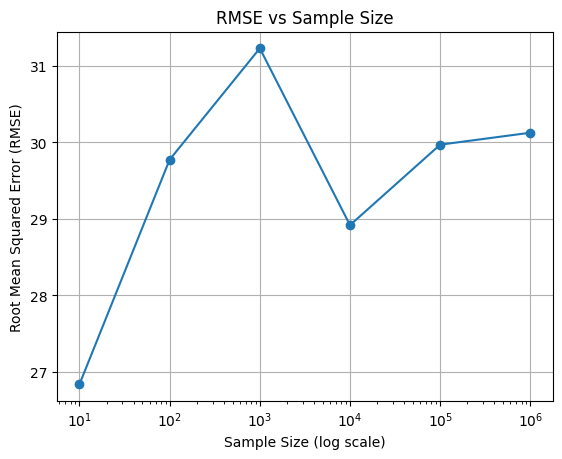

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define a function to perform the regression fit
def regression_fit(X, y):
    return np.linalg.inv(X.T @ X) @ X.T @ y 

# Define a function to calculate RMSE
def calculate_rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

# Initialize sample sizes
sample_sizes = [10, 100, 1000, 10000, 100000, 1000000]

# Initialize lists to store RMSE values
rmse_values = []

for sample_size in sample_sizes:
    # Data Generation
    np.random.seed(42)
    minutes = np.abs(np.random.normal(loc=100, scale=100, size=sample_size))
    sms = np.random.uniform(low=0, high=50, size=sample_size)
    surf = np.abs(np.random.normal(loc=0, scale=2, size=sample_size))
    e = np.abs(np.random.normal(loc=0, scale=50, size=sample_size))
    y = 25 + (2 * minutes) + (0.5 * sms) + (50 * surf) + e
    df = pd.DataFrame({
        'intercept': np.ones(sample_size),
        'minutes': minutes,
        'sms': sms,
        'surf': surf,
        'cost': y
    })

    # Filtering Data
    filtered_df = df.query("minutes < 300 and surf < 4 and cost > 0")

    # Data Splitting
    X = filtered_df[['intercept', 'minutes', 'sms', 'surf']].values # .values return a Numpy rep of DF
    y = filtered_df['cost'].values
    train_size = int(0.8 * len(X))
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    # Model Fitting
    beta_hat = regression_fit(X_train, y_train)

    # Prediction
    y_hat = X_test @ beta_hat

    # Calculate RMSE
    rmse = calculate_rmse(y_test, y_hat)
    rmse_values.append(rmse)

# Plot RMSE against sample size
plt.plot(sample_sizes, rmse_values, marker='o')
plt.xscale('log')  # Log scale for x-axis
plt.xlabel('Sample Size (log scale)')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.title('RMSE vs Sample Size')
plt.grid(True)
plt.show()
